In [ ]:
'''
300:

GCC
GGC
TCC
ACC
GAA
TGC
TTG
AAC
ATC
TTC
GAC
ATG
GTC
GTG
AGC
TAA
TAC
AGG
GTT
ATT
AAA
GTA
GCA
AGA
ATA
CCC
TGA

'''

In [ ]:
'''
600

GCC
GGC
TCC
ACC
GAA
TGC
TTG
AAC
ATC
TTC
GAC
ATG
GTC
GTG
AGC
TAA
TAC
AGG
GTT
ATT
AAA
GTA
GCA
AGA
ATA
CCC
TGA
TAG

'''

In [1]:
# We're gonna use 600:
# I am avoiding: 'a', 't', 'c', 'g'
# because it will be confusing

DISCOUNT_CODON_TO_CHAR = {
    'GCC': 'q',
    'GGC': 'w',
    'TCC': 'e',
    'ACC': 'r',
    'GAA': '1',
    'TGC': 'y',
    'TTG': 'u',
    'AAC': 'i',
    'ATC': 'o',
    'TTC': 'p',
    'GAC': 's',
    'ATG': 'd',
    'GTC': 'f',
    'GTG': 'h',
    'AGC': 'j',
    'TAA': 'k',
    'TAC': 'l',
    'AGG': 'z',
    'GTT': 'x',
    'ATT': 'v',
    'AAA': 'b',
    'GTA': 'n',
    'GCA': 'm',
    'AGA': '2',
    'ATA': '3',
    'CCC': '4',
    'TGA': '5',
    'TAG': '6'
}

In [8]:
from masked_lm.utils import read_fasta

raw_sequences = read_fasta("/home/couchbucks/Documents/saketh/cpe/data/datasets/mdh/mdh_natural_dataset.fasta")

In [9]:
sequences = [seq.sequence for seq in raw_sequences]
tags = [seq.tag for seq in raw_sequences]

In [11]:
from masked_lm.utils import seq_to_codon_list

In [12]:
seq_to_codon_list("AATTTGGGCCCG")

['AAT', 'TTG', 'GGC', 'CCG']

In [15]:
def convert_seq_to_new(seq: str, discount_dict: dict, join_char: str = ''):
    codon_seq = seq_to_codon_list(seq)
    important_codons = list(discount_dict.keys())
    
    new_codons = []
    for codon in codon_seq:
        if codon in important_codons:
            new_codons.append(discount_dict[codon])
        else:
            new_codons.append(codon)
    
    return join_char.join(new_codons)

In [16]:
convert_seq_to_new(sequences[0], DISCOUNT_CODON_TO_CHAR)

'djAAGfrfnGGGqwAAGlGGATCArrqdCGGCTCGCT1qsofsGAGffdrsvfGAGGGTCTA4CAGwCTGGCGCTCGAToAATCAGTCGCGGCCGCTGCTCwlCGGrforGGTTCGislqqACTqwjGATfhforqGGGuCCGCGCAAGCCAwdAGTCGCdsCTCCTCGAGfAATqAAGofAAGsfrfCAG3qGAGCATTCGCCGsGCGfooifACGiCCGCTCGATCACdACArCTGGCGGCG1newpsrCGCCGGfdGGACAGmwdCTCseGCTCGTpGCTCATpom1hrGGTqsodsfGAGGCTCTTrCTCwjCACGGAGAGrdfCCGxCCGTCACAArAAGhGGGwbCTCCTCqGATCTCfGATqsqfGAGTCGCTCfsCGGrCGCAAGGGTGGGqGAGxxGCGCTCCTCAAGrwjqTATlq4TCGGCGGCTqqAAGdf1qfvGGAGATrwGAGhdCCGnTGTqTGGdAGTwGAGlGGGoesnlCTCGGTxCCAmAGTCTCwbGAGwhAAGGAGof1CTCCCGCTCrsACTGAGmrGCGCTGTCT1GCTGCGGCGehAAG1AAGfsGAGCTGCACGAGuGATCTGGGA6'

In [22]:
new_seqs = [convert_seq_to_new(seq.sequence, DISCOUNT_CODON_TO_CHAR) for seq in raw_sequences]

In [26]:
from masked_lm.utils import Sequence

In [27]:
write_seqs = [Sequence(sequence=seq, tag=tag) for seq, tag in zip(new_seqs, tags)]

In [21]:
from masked_lm.utils import write_fasta, write_fasta

In [29]:
write_fasta(write_seqs, "new_comb_mdh.fasta")

In [30]:
from sklearn.model_selection import train_test_split

# Assuming 'sequences' is your list of sequences
# Set the test_size and validation_size according to your preference
# For example, test_size=0.2 means 80% training and 20% testing

# Splitting into training and temporary (validation + testing)
train_sequences, temp_sequences = train_test_split(write_seqs, test_size=0.2, random_state=42)

# Splitting the temporary set into validation and testing
validation_sequences, test_sequences = train_test_split(temp_sequences, test_size=0.5, random_state=42)

# Now you have three sets: train_sequences, validation_sequences, and test_sequences


In [33]:
len(test_sequences)

3664

In [34]:
write_fasta(train_sequences, 'new_comb_train.fasta')
write_fasta(validation_sequences, 'new_comb_valid.fasta')
write_fasta(test_sequences, 'new_comb_test.fasta')

In [35]:
sequences = [seq.sequence for seq in raw_sequences]

In [36]:
lens = [len(seq) for seq in sequences]

In [37]:
import matplotlib.pyplot as plt

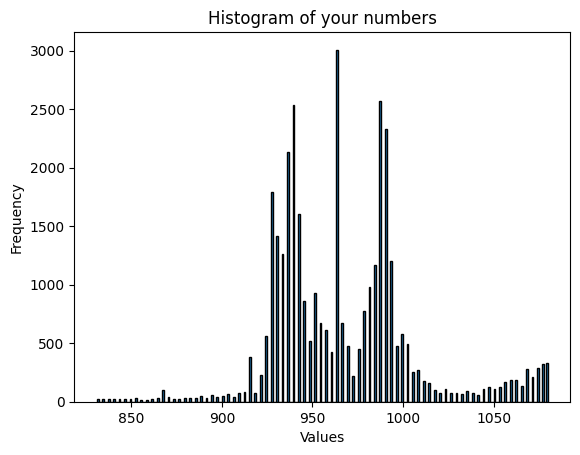

In [38]:
plt.hist(lens, bins=range(min(lens), max(lens)+1), edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of your numbers')
plt.show()

In [44]:
vocab = {
      "[UNK]": 0,
      "[CLS]": 1,
      "[SEP]": 2,
      "[PAD]": 3,
      "[MASK]": 4,
      "[BOS]": 5,
      "[EOS]": 6,
      "!": 7,
      "0": 8,
      "1": 9,
      "2": 10,
      "3": 11,
      "4": 12,
      "5": 13,
      "6": 14,
      "7": 15,
      "8": 16,
      "9": 17,
      "@": 18,
      "A": 19,
      "B": 20,
      "C": 21,
      "D": 22,
      "E": 23,
      "F": 24,
      "G": 25,
      "H": 26,
      "I": 27,
      "J": 28,
      "K": 29,
      "L": 30,
      "M": 31,
      "N": 32,
      "O": 33,
      "P": 34,
      "Q": 35,
      "R": 36,
      "S": 37,
      "T": 38,
      "U": 39,
      "V": 40,
      "W": 41,
      "X": 42,
      "Y": 43,
      "Z": 44,
      "a": 45,
      "b": 46,
      "c": 47,
      "d": 48,
      "e": 49,
      "f": 50,
      "g": 51,
      "h": 52,
      "i": 53,
      "j": 54,
      "k": 55,
      "l": 56,
      "m": 57,
      "n": 58,
      "o": 59,
      "p": 60,
      "q": 61,
      "r": 62,
      "s": 63,
      "t": 64,
      "u": 65,
      "v": 66,
      "w": 67,
      "x": 68,
      "y": 69,
      "z": 70,
      "NN": 71,
      "22": 72,
      "Js": 73,
      "WW": 74,
      "24": 75,
      "ll": 76,
      "Wt": 77,
      "NZ": 78,
      "Nn": 79,
      "sW": 80,
      "Ws": 81,
      "re": 82,
      "wI": 83,
      "Ne": 84,
      "lJ": 85,
      "ah": 86,
      "Ns": 87,
      "Nd": 88,
      "21": 89,
      "tr": 90,
      "WN": 91,
      "qD": 92,
      "84": 93,
      "tt": 95,
      "ls": 96,
      "aa": 97,
      "ww": 98,
      "WZ": 99,
      "Iw": 100,
      "11": 101,
      "tZ": 103,
      "bn": 104,
      "We": 105,
      "Wa": 106,
      "26": 107,
      "82": 108,
      "Nw": 109,
      "ss": 110,
      "44": 111,
      "al": 112,
      "bO": 113,
      "tN": 114,
      "bD": 116,
      "tW": 118,
      "aW": 119,
      "42": 120,
      "Iq": 122,
      "cw": 123,
      "II": 124,
      "lh": 125,
      "Jq": 126,
      "Nr": 127,
      "Wh": 128,
      "bc": 129,
      "su": 130,
      "lq": 132,
      "62": 133,
      "lW": 134,
      "Cq": 135,
      "bB": 136,
      "ds": 137,
      "12": 138,
      "Nq": 139,
      "mn": 140,
      "DD": 141,
      "rz": 142,
      "Nb": 143,
      "OO": 144,
      "eh": 145,
      "Is": 146,
      "wZ": 147,
      "Iz": 148,
      "lV": 150,
      "sa": 151,
      "78": 152,
      "Wd": 154,
      "WO": 155,
      "Wb": 156,
      "dh": 157,
      "DO": 158,
      "cc": 159,
      "ts": 160,
      "Wr": 162,
      "eN": 164,
      "mD": 165,
      "at": 166,
      "Eq": 167,
      "16": 168,
      "27": 169,
      "JN": 171,
      "Zl": 172,
      "bw": 173,
      "18": 174,
      "AN": 175,
      "rN": 176,
      "Ie": 177,
      "Bw": 178,
      "eT": 179,
      "aN": 180,
      "lN": 181,
      "qO": 182,
      "Vs": 183,
      "Te": 184,
      "Db": 185,
      "41": 186,
      "Ww": 187,
      "ar": 188,
      "JZ": 189,
      "Nz": 190,
      "lr": 191,
      "sr": 192,
      "qq": 193,
      "lw": 194,
      "IB": 195,
      "sZ": 196,
      "an": 197,
      "64": 198,
      "gI": 199,
      "st": 200,
      "Ow": 201,
      "BB": 202,
      "lZ": 203,
      "aJ": 204,
      "bR": 205,
      "ID": 206,
      "cN": 207,
      "JW": 208,
      "dr": 209,
      "te": 210,
      "mB": 211,
      "la": 212,
      "ZZ": 213,
      "WD": 214,
      "68": 215,
      "zB": 216,
      "DN": 217,
      "QN": 218,
      "bN": 219,
      "IZ": 220,
      "ba": 221,
      "Dh": 222,
      "qW": 223,
      "ZQ": 224,
      "cB": 225,
      "624": 226,
      "qg": 227,
      "Zd": 228,
      "wl": 229,
      "sq": 230,
      "!s": 231,
      "Nl": 232,
      "Dc": 233,
      "WV": 234,
      "bb": 235,
      "tw": 236,
      "qa": 237,
      "NQ": 238,
      "fc": 239,
      "sS": 240,
      "Cw": 241,
      "fB": 242,
      "Ig": 243,
      "Jr": 246,
      "61": 247,
      "bg": 248,
      "Dw": 249
    }

In [46]:
chars = [token for token in vocab]

In [48]:
new_dict = {}

for i, token in enumerate(chars):
    new_dict[token] = i

In [49]:
new_dict

{'[UNK]': 0,
 '[CLS]': 1,
 '[SEP]': 2,
 '[PAD]': 3,
 '[MASK]': 4,
 '[BOS]': 5,
 '[EOS]': 6,
 '!': 7,
 '0': 8,
 '1': 9,
 '2': 10,
 '3': 11,
 '4': 12,
 '5': 13,
 '6': 14,
 '7': 15,
 '8': 16,
 '9': 17,
 '@': 18,
 'A': 19,
 'B': 20,
 'C': 21,
 'D': 22,
 'E': 23,
 'F': 24,
 'G': 25,
 'H': 26,
 'I': 27,
 'J': 28,
 'K': 29,
 'L': 30,
 'M': 31,
 'N': 32,
 'O': 33,
 'P': 34,
 'Q': 35,
 'R': 36,
 'S': 37,
 'T': 38,
 'U': 39,
 'V': 40,
 'W': 41,
 'X': 42,
 'Y': 43,
 'Z': 44,
 'a': 45,
 'b': 46,
 'c': 47,
 'd': 48,
 'e': 49,
 'f': 50,
 'g': 51,
 'h': 52,
 'i': 53,
 'j': 54,
 'k': 55,
 'l': 56,
 'm': 57,
 'n': 58,
 'o': 59,
 'p': 60,
 'q': 61,
 'r': 62,
 's': 63,
 't': 64,
 'u': 65,
 'v': 66,
 'w': 67,
 'x': 68,
 'y': 69,
 'z': 70,
 'NN': 71,
 '22': 72,
 'Js': 73,
 'WW': 74,
 '24': 75,
 'll': 76,
 'Wt': 77,
 'NZ': 78,
 'Nn': 79,
 'sW': 80,
 'Ws': 81,
 're': 82,
 'wI': 83,
 'Ne': 84,
 'lJ': 85,
 'ah': 86,
 'Ns': 87,
 'Nd': 88,
 '21': 89,
 'tr': 90,
 'WN': 91,
 'qD': 92,
 '84': 93,
 'tt': 94,
 'ls': 

In [1]:

CODON_TO_CHAR = {
    "TCG": "A",
    "GCA": "B",
    "CTT": "C",
    "ATT": "D",
    "TTA": "E",
    "GGG": "F",
    "CGT": "G",
    "TAA": "H",
    "AAA": "I",
    "CTC": "J",
    "AGT": "K",
    "CCA": "L",
    "TGT": "M",
    "GCC": "N",
    "GTT": "O",
    "ATA": "P",
    "TAC": "Q",
    "TTT": "R",
    "TGC": "S",
    "CAC": "T",
    "ACG": "U",
    "CCC": "V",
    "ATC": "W",
    "CAT": "X",
    "AGA": "Y",
    "GAG": "Z",
    "GTG": "a",
    "GGT": "b",
    "GCT": "c",
    "TTC": "d",
    "AAC": "e",
    "TAT": "f",
    "GTA": "g",
    "CCG": "h",
    "ACA": "i",
    "CGA": "j",
    "TAG": "k",
    "CTG": "l",
    "GGA": "m",
    "ATG": "n",
    "TCT": "o",
    "CGG": "p",
    "GAT": "q",
    "ACC": "r",
    "GAC": "s",
    "GTC": "t",
    "TGG": "u",
    "CCT": "v",
    "GAA": "w",
    "TCA": "x",
    "CAA": "y",
    "AAT": "z",
    "ACT": "0",
    "GCG": "1",
    "GGC": "2",
    "CTA": "3",
    "AAG": "4",
    "AGG": "5",
    "CAG": "6",
    "AGC": "7",
    "CGC": "8",
    "TTG": "9",
    "TCC": "!",
    "TGA": "@",
    "XXX": "*",
}

In [2]:
def cpe_translate(seq: str):
    list_str = seq.split(" ")
    join_str = ''
    for token in list_str:
        join_str += CODON_TO_CHAR[token]
    return join_str

In [6]:
cpe_translate("TAG AGG GCC TAT CAC")

'k5NfT'